<a href="https://colab.research.google.com/github/orenfix10/ML-project1/blob/main/Ex3_2023a_Ensemble_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Names and IDs
 1. 315666479
 2. 318595386

# I. Condorcet's Jury Theorem (1785) (15 points)

Assume voter probability to be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging).

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

Notes: Avoid loops where possible.

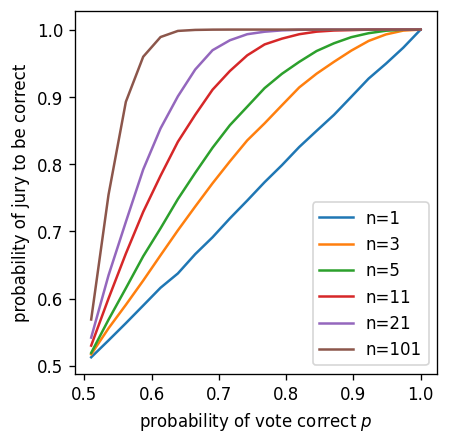

In [ ]:
# Implement here

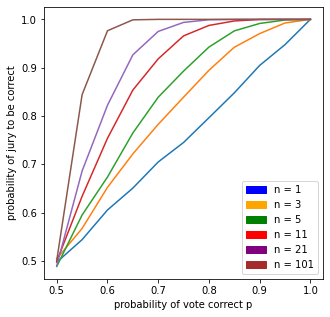

In [51]:
import matplotlib.pyplot as plt
import numpy as np


def sampels(n,p,m):
  sampels = p_values = np.random.binomial(1, p, size = (m,n))
  sampels = sampels.sum(axis=1,dtype = 'float')
  sampels = sampels[sampels > n/2]
  return len(sampels)/m


def sim(m):
  n = [1, 3, 5, 11, 21, 101]
  p = np.linspace(0.5, 1.0, 11)
  prob = [[sampels(n_, p_, m) for p_ in p] for n_ in n]
  return np.array(prob)


m = 10000
probability  = sim(m)


x = np.linspace(0.5, 1.0, 11)
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.plot(x, probability.T)
plt.ylabel('probability of jury to be correct')
plt.xlabel('probability of vote correct p')
arr1 = plt.arrow(0,0, 0,0, head_width=0.2, color='blue', length_includes_head=True)
arr2 = plt.arrow(0,0, 0,0, head_width=0.2, color='orange', length_includes_head=True)
arr3 = plt.arrow(0,0, 0,0, head_width=0.2, color='green', length_includes_head=True)
arr4 = plt.arrow(0,0, 0,0, head_width=0.2, color='red', length_includes_head=True)
arr5 = plt.arrow(0,0, 0,0, head_width=0.2, color='purple', length_includes_head=True)
arr6 = plt.arrow(0,0, 0,0, head_width=0.2, color='brown', length_includes_head=True)
plt.legend([arr1, arr2, arr3, arr4, arr5, arr6], ['n = 1', 'n = 3', 'n = 5', 'n = 11', 'n = 21', 'n = 101'])
plt.show()


Your proves goes here

# II. AdaBoost (35 points)
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm) with the next parameters:
        - *tol=1e-5,loss='hinge', C=1e5, max_iter=1e6*
    - Split the sample set into 2/3rd train set and 1/3 test set.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function plot_data or your own function to plot the final decision plane of each ensemble model.

* Answer to the next questions:

 1. How does the overall train set accuracy change with $n$?
 2. Does your model start to overfit at some point? How can you test and detect such a point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note:** 
 * Explain you results in text and support it with figures.

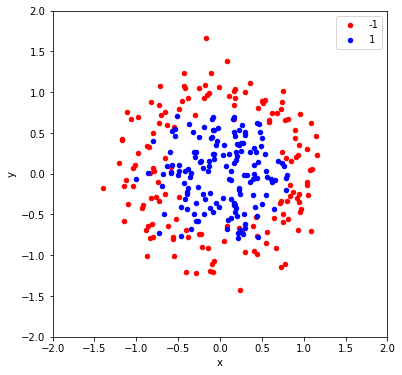

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [ ]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accepts X and returns the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key])
  
    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
  
    ax.axis('scaled')

#### Answer


---
# Section 2 - Kaggle competition
---

# miRNA animals interaction prediction (50 pts + 10 pts)
In this section, you will explain the tools and methods you used in the competition. Fifty points will be given according to the explanations of the section and up to ten additional points according to your relative position in the competition. Participate in the following contest and answer the following questions:
https://www.kaggle.com/t/3c2cb35d174c287b7fcaf1c716f523ef





### EDA - Exploratory Data Analysis (10 pts):
Use any visual tools to present and explain the data. Your answer must include statistics, images, and conclusions. 

***Write your code below***


In [ ]:
# Implement here

In [ ]:
# Explain here

### Preprocessing (10 pts):
Describe in detail what did you do in the preprocessing phase and why you did it. 

***Write your code below***

In [ ]:
# Implement here

In [ ]:
# Explain here

### Model training (10 pts):
Train your ML model.
Explain in detail what model you used to achieve your highest score, what the hyper-parameters were, and why did you choose both the model and these parameters.
Attach at least two learning plot and explain them.

***Write your code below***

In [ ]:
# Implement here

In [ ]:
# Explain here

### Model evaluation (10 pts):
Eevaluate your ML model using different evaluation metrics.
For every evaluation metric mention below add your model score and answer the following questions:

What does this evaluation metric mean? is it relevant to this prediction task?
Do you think the score you got is good for this task?


***Write your code below***

In [ ]:
# Implement here

In [ ]:
# List of evaluation metrics
# Accuracy -
# Balanced Accuracy -
# Micro Precision -
# Micro Recall -
# Micro F1-score -
# Macro Precision -
# Macro Recall -
# Macro F1-score -
# Weighted Precision -
# Weighted Recall -
# Weighted F1-score -

### Explainability (10 pts):
Explain the results of your model using SHAP and attach relevant outputs. Explain at least three conclusions following the SHAP outputs.

**Note:**
Use the animal names in your conclusions and not the label numbers.

***Write your code below***

In [ ]:
# Implement here

In [ ]:
# Explain here

### Competition rank (10 pts):
The competition will end on 29.12 at 23:59. The results of the competition will be published about 12 hours later under the private tab on the leaderboard.

The scoring of this section is relative to the location (between 0-10 pts).

Indicate here your team name in the competition and **attach an additinal notebook\python code** with which we can reproduce the rank you received.


In [ ]:
# My team name was:
'wakanda forever'